In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/Iris%20(4).csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', nan],
      dtype=object)

In [ ]:
df = df.drop('Id', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  158 non-null    float64
 1   SepalWidthCm   158 non-null    float64
 2   PetalLengthCm  158 non-null    float64
 3   PetalWidthCm   158 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.3+ KB


In [ ]:
df[df['Species'].isnull()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
150,5.3,3.7,1.5,0.2,NaN
151,5.0,3.3,1.4,0.2,NaN
152,5.1,2.5,3.0,1.1,NaN
153,5.7,2.8,4.1,1.3,NaN
154,5.9,3.0,5.1,1.8,NaN
155,6.4,3.2,5.3,2.3,NaN
156,6.9,3.1,5.1,2.3,NaN
157,5.0,3.1,1.2,0.2,NaN


In [ ]:
df.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [ ]:
# Replace the missing 'Species' of data 150 to 157 from your corresponding analysis

df.at[150, 'Species'] = 'Iris-setosa'
df.at[151, 'Species'] = 'Iris-setosa'
df.at[152, 'Species'] = 'Iris-versicolor'
df.at[153, 'Species'] = 'Iris-virsicolor'
df.at[154, 'Species'] = 'Iris-virginica'
df.at[155, 'Species'] = 'Iris-virginica'
df.at[156, 'Species'] = 'Iris-virginica'
df.at[157, 'Species'] = 'Iris-setosa'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  158 non-null    float64
 1   SepalWidthCm   158 non-null    float64
 2   PetalLengthCm  158 non-null    float64
 3   PetalWidthCm   158 non-null    float64
 4   Species        158 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.3+ KB


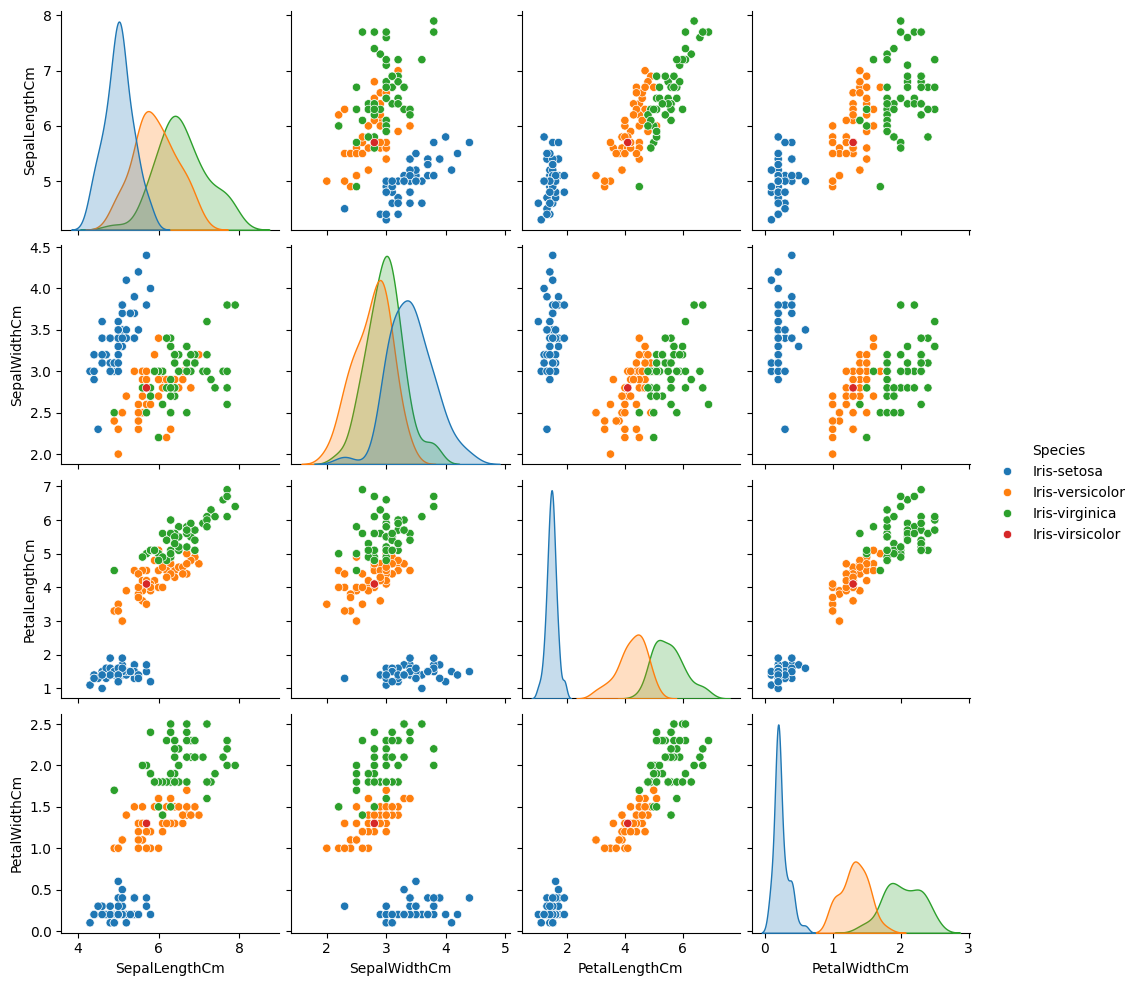

In [ ]:
sns.pairplot(df, hue = 'Species')

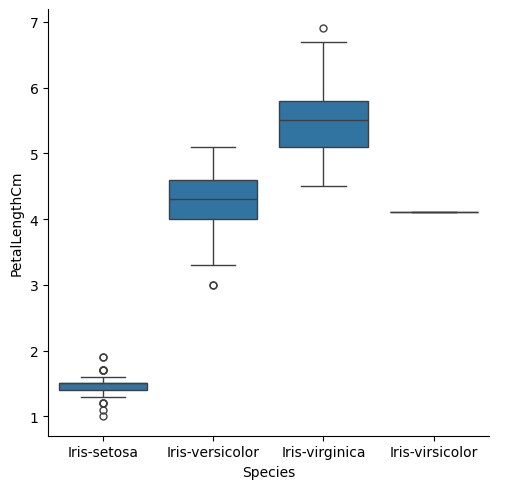

In [ ]:
sns.catplot(x = 'Species', y = 'PetalLengthCm', data = df, kind = 'box')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Species', axis = 1)
y = df['Species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)


In [ ]:
#Import
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state = 101)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [ ]:
#prediction
prediction = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

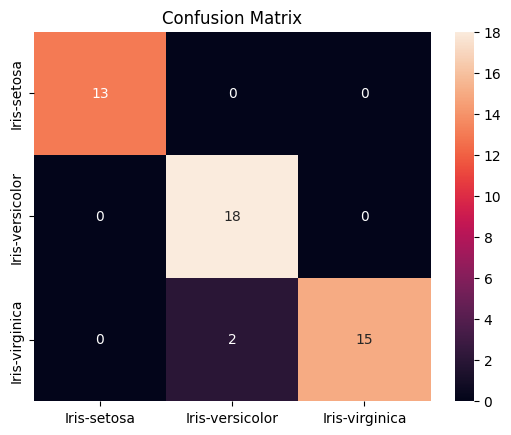

In [ ]:
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot = True, fmt = 'g', xticklabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']).set(title = 'Confusion Matrix')
plt.show()

In [ ]:
#Classification Report
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.90      1.00      0.95        18
 Iris-virginica       1.00      0.88      0.94        17

       accuracy                           0.96        48
      macro avg       0.97      0.96      0.96        48
   weighted avg       0.96      0.96      0.96        48



In [ ]:
#Identify Feature Importance
pd.DataFrame(index = X.columns, columns = ['Feature Importance'], data = model.feature_importances_).sort_values('Feature Importance', ascending = False)

,Feature Importance
PetalWidthCm,0.872130
PetalLengthCm,0.089847
SepalLengthCm,0.030443
SepalWidthCm,0.007580


In [ ]:
input_features = np.array([[4.25, 3.18, 1.25, 0.31]])

Plots